# Содержание

* Загрузка данных
* Умножение матриц
* Алгоритм преобразования
* Проверка алгоритма
* Вывод

# Защита персональных данных клиентов

Нам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработаем такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-pastel')
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

import time
from tqdm import tqdm

In [2]:
try:
    data = pd.read_csv('E:/BuduBogatym/insurance.csv')
except:
    data = pd.read_csv(
        'https://code.s3.yandex.net/datasets/insurance.csv')

In [3]:
# Посмотрим таблицу

data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Судя по количеству значений в каждом столбце - пропуски отсутствуют 

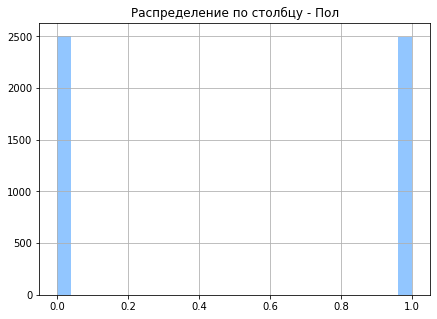

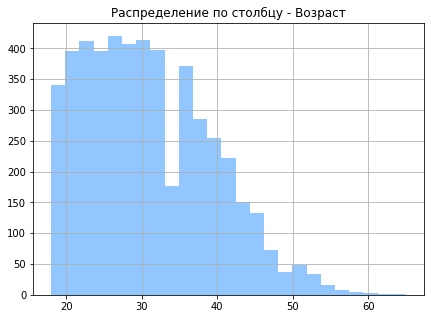

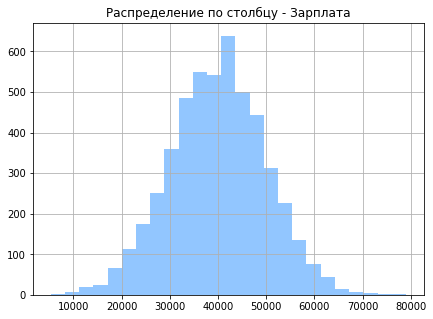

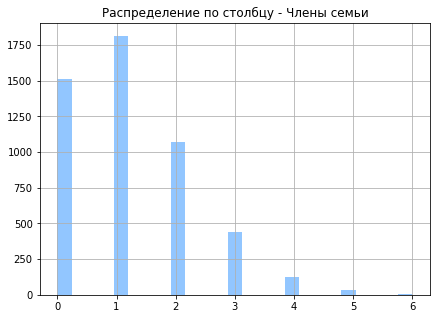

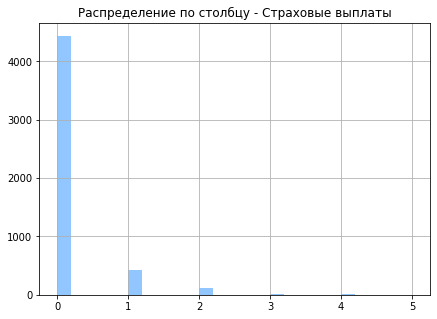

In [5]:
for i in data.columns:
    plt.figure(figsize=(7,5))
    data[i].hist(bins=25)
    plt.title(f'Распределение по столбцу - {i}')

**Вывод:**

* Пропуски отсутствуют
* Аномальные значения (выбросы) на гистограммах отсутствуют
* Лишние данные отсутствуют

## Умножение матриц

Ответьте на вопрос и обоснуйте решение.

Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?

**a.** Изменится. Приведите примеры матриц.

**b.** Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

Обозначения:

* **X** — матрица признаков (нулевой столбец состоит из единиц)

* **y** — вектор целевого признака

* **P** — матрица, на которую умножаются признаки

* **w** — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$a=Xw$$

Задача обучения:

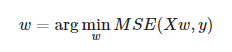

Формула обучения:

$$w=(x^{T}X)^{-1}X^{T}y$$

**Обоснование:**  
 Изучим следующие свойства матриц
1. $$ AA^{-1}=E$$
2. $$(AB)^{T}=B^{T}A^{T}$$
3. $$(AB)^{-1}=B^{-1}A^{-1}$$
4. $$(AB)C=A(BC)$$

Из данных свойст можно выделить второе и четвертое, которые всегда применимы, а также первое и третье, которые применимы только в случае обратных матриц
  
Подставим наши аргументы в данные равенства:

1. $$ PP^{-1}=E$$
2. $$(XP)^{T}=P^{T}X^{T}$$
3. $$(XP)^{-1}=P^{-1}X^{-1}$$
4. $$(XP)C=X(PC)$$

Подставим в формулу обучения:

$$w'=((XP)^{T}XP)^{-1}P^{T}X^{T}y$$

Раскроем скобки внутри скобок согласно второму свойству матриц:

$$w'=((P^{T}X^{T}XP)^{-1}P^{T}X^{T}y$$

Раскроем скобки, а также упростим выражение согласно первому свойству матриц:

$$w'=P^{-1}(X^{T}X)^{-1}(P^{T})^{-1}P^{T}X^{T}y$$
$$w'=P^{-1}(X^{T}X)^{-1}X^{T}y$$

Сократим данное выражение в соответствии с формулой обучения:

$$w'=P^{-1}w$$

Подставим в предсказания перемноженные матрицы:

$$a'=XPw'$$

В итоге получим:

$$a'=XPP^{-1}w$$
$$a'=Xw=a$$
$$a'=a$$

**Вывод:**  
При использовании обратной матрицы признаков, как метод шифрования данных - метрика не меняется, согласно вышеприведённому доказательству

## Алгоритм преобразования

**Предложите алгоритм преобразования данных для решения задачи. Обоснуйте, почему качество линейной регрессии не поменяется.**

**Алгоритм**

Для преобразования воспользуемся данным алгоритмом:

1. Разделим данные на признаки и целевой признак.
2. Cоздадим рандомизированную квадратную матрицу, ширина которой будет равняться количеству признаков.
3. Проверим матрицу на обратимость. Если необратима - зададим другие параметры рандомизации.
4. Преобразуем признаки, умножив их на матрицу и сохраним их в новой переменной - зашифрованной таблице.
5. Сохраним обратную матрицу, чтобы была возможность дешифровать признаки.
6. Разделим изначальный датасет и зашифрованный на тестовую и тренировочную выборку.
7. Проверим метрики. Если не отличаются - задача выполнена.
**Обоснование**

Так как, на основании полученной ранее формулы, где предсказания  равны , при умножении матрицы признаков на обратимую матрицу, метрики качества не изменятся.

Проверим наш алгоритм.

## Проверка алгоритма

Запрограммируйте этот алгоритм, применив матричные операции. Проверьте, что качество линейной регрессии из sklearn не отличается до и после преобразования. Примените метрику R2.

Создадим функцию, которая выполняет необходимые операции:

In [6]:
# Создаём функцию, которая преобразовывает данные:

def encode(data, randomstate=12345, randint=1000):
    try:
        # задаём рандом
        rng = np.random.RandomState(randomstate)
        
        # создаём матрицу, где идет разброс значений от 0 до 1000
        P = rng.randint(randint, size=(data.shape[1], data.shape[1]))
        
        # проверяем обратимость. Если будет необратимая - перенесет на except
        Pinv = np.linalg.inv(P)
        
        # преобразуем таблицу и снова задаём столбцы
        encoded_data = np.dot(data, P)
        encoded_data = pd.DataFrame(encoded_data, columns=data.columns)
        
        # возвращаем ключ шифрования и преобразованную таблицу
        return encoded_data, Pinv
    except:
        print('Cannot create inverted matrix. Try another RandInt or RandomState.')

In [7]:
# Разделим датасет на целевые и обычные признаки

features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']

features_encoded, encode_key = encode(features)


In [8]:
#Проверим зашифрованные данные

features_encoded

,Пол,Возраст,Зарплата,Члены семьи
0,27099671.0,26851825.0,38159001.0,5867671.0
1,20767689.0,20577865.0,29240226.0,4500527.0
2,11478180.0,11373325.0,16160078.0,2488353.0
3,22777758.0,22569255.0,32076630.0,4928307.0
4,14262842.0,14132485.0,20081881.0,3089925.0
...,...,...,...,...
4995,19504698.0,19326230.0,27465304.0,4222806.0
4996,28625049.0,28363165.0,40309242.0,6195443.0
4997,18518538.0,18349030.0,26078048.0,4007550.0
4998,17865029.0,17701480.0,25156951.0,3866898.0


Создадим функцию, для проверки метрики r2

In [9]:
def check_r2(features, target, model=LinearRegression()):
    
    train_features, test_features, train_target, test_target = \
    train_test_split(features, target, test_size=0.2, random_state=12345)
                                                                                                                                                                
                                                                            
    model = model
    model.fit(train_features, train_target)
    
    train_predicted = model.predict(train_features)
    test_predicted = model.predict(test_features)
    
    train_score = r2_score(train_target, train_predicted)
    test_score = r2_score(test_target, test_predicted)
    
    print('Метрика R2 на тренировочной выборке:', round(train_score, 4), 
          '\nМетрика R2 на тестовой выборке:', round(test_score, 4))

Проверим на обычном датасете:

In [10]:
check_r2(features, target)

Метрика R2 на тренировочной выборке: 0.4273 
Метрика R2 на тестовой выборке: 0.4118


Проверим на зашифрованном датасете:

In [11]:
check_r2(features_encoded, target)

Метрика R2 на тренировочной выборке: 0.4273 
Метрика R2 на тестовой выборке: 0.4118


## Вывод

Метрика моделей r2 до и после шифрования не притерпела никаких изменений, следовательно данной функцией можно пользоваться компании, чтобы защитить данные своих клиентов. При этом шифровка никак не повлияет на качество модели!